## EDA and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import training and testing data, to clean all columns.

In [2]:
housing_train = pd.read_csv('../datasets/train.csv')

In [3]:
housing_test = pd.read_csv('../datasets/test.csv')

### Housing contains both datasets

The purpose of this is so that any changes made to the training set are also made to the testing set that has been held out.  Note these are not the same as the train/test split sets.

In [4]:
housing = pd.concat([housing_train, housing_test], sort=False)

In [5]:
housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0


In [6]:
housing.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2051.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,181469.701609
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79258.659352
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style    

## Null Values

There are a couple of columns that have a lot of missing data.  These columns don't seem to add much value, and the Misc Feature column already has another column labeled 'Misc Value' that automatically inputs the added value, so this column is partially redundant anyway.

In [8]:
housing.isnull().mean().sort_values(ascending=False).head(30)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Fireplace Qu      0.485324
SalePrice         0.300000
Lot Frontage      0.167235
Garage Finish     0.054266
Garage Qual       0.054266
Garage Cond       0.054266
Garage Yr Blt     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Cond         0.027304
Bsmt Qual         0.027304
BsmtFin Type 1    0.027304
Mas Vnr Area      0.007850
Mas Vnr Type      0.007850
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
Garage Cars       0.000341
Garage Area       0.000341
Total Bsmt SF     0.000341
BsmtFin SF 2      0.000341
Electrical        0.000341
BsmtFin SF 1      0.000341
Bsmt Unf SF       0.000341
Kitchen Qual      0.000000
Kitchen AbvGr     0.000000
dtype: float64

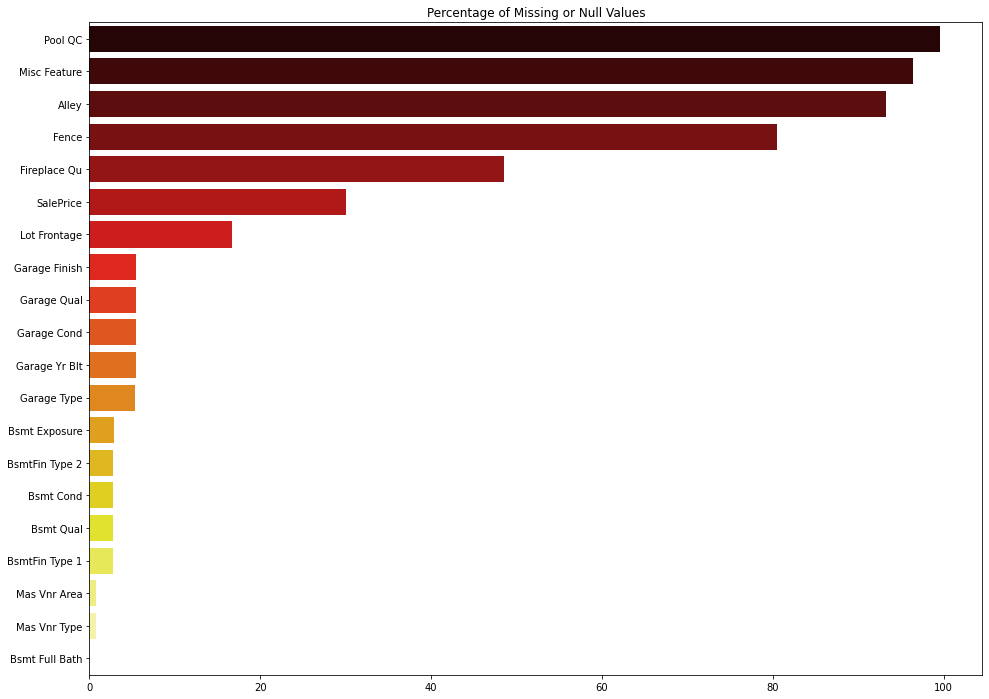

In [9]:
plt.figure(figsize=(16,12))
plt.title('Percentage of Missing or Null Values')
sns.barplot(
    palette='hot',
    x=housing.isnull().mean().sort_values(ascending=False).head(20).values*100,
    y=housing.isnull().mean().sort_values(ascending=False).head(20).index,
    );

### Missing Values

> Drop columns with more than 50% missing values

In [10]:
housing.drop(columns=housing.loc[:,housing.isnull().mean() > .5].columns, inplace=True)

### Unnecessary Columns
- Id and PID are just used as reference columns and have no bearing on the sale price of the home

In [11]:
housing.drop(columns=['Id', 'PID'], inplace=True)

In [12]:
housing.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

## Splitting the Data:
---

It will be much easier to work with the data for both visualizing and analysis, along with imputing values and filling/dropping nulls if we split the data into:  
- Categorical Columns
- Ordinal Columns
- Numerical Columns

## Categorical Columns:

In [13]:
cat_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config',
            'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
            'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
            'Central Air', 'Garage Type', 'Sale Type', 'Mo Sold', 'Yr Sold']

### Check and fill null values

In [14]:
housing[cat_cols].isnull().sum().sort_values(ascending=False)

Garage Type     157
Mas Vnr Type     23
MS SubClass       0
MS Zoning         0
Mo Sold           0
Sale Type         0
Central Air       0
Heating           0
Foundation        0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
Roof Style        0
House Style       0
Bldg Type         0
Condition 2       0
Condition 1       0
Neighborhood      0
Lot Config        0
Land Contour      0
Street            0
Yr Sold           0
dtype: int64

In [15]:
housing.groupby(by='Garage Type')['Garage Type'].count()

Garage Type
2Types       23
Attchd     1731
Basment      36
BuiltIn     186
CarPort      15
Detchd      782
Name: Garage Type, dtype: int64

In [16]:
# NA should be 'No Garage'
housing['Garage Type'].fillna('No Garage', inplace=True)

In [17]:
housing.groupby(by='Mas Vnr Type')['Mas Vnr Type'].count()

Mas Vnr Type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       249
Name: Mas Vnr Type, dtype: int64

In [18]:
# NA should be None
housing['Mas Vnr Type'].fillna('None', inplace=True)

## Ordinal Columns:

In [19]:
ord_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
            'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
            'Garage Qual', 'Garage Cond', 'Paved Drive']

### Fill all null values appropriately

In [20]:
housing[ord_cols].isnull().sum().sort_values(ascending=False)

Fireplace Qu      1422
Garage Cond        159
Garage Qual        159
Garage Finish      159
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Electrical           1
Functional           0
Kitchen Qual         0
Lot Shape            0
Heating QC           0
Utilities            0
Exter Cond           0
Exter Qual           0
Overall Cond         0
Overall Qual         0
Land Slope           0
Paved Drive          0
dtype: int64

In [21]:
housing.groupby(by='Fireplace Qu')['Fireplace Qu'].count()

Fireplace Qu
Ex     43
Fa     75
Gd    744
Po     46
TA    600
Name: Fireplace Qu, dtype: int64

In [22]:
# NA should be No fireplace
housing['Fireplace Qu'].fillna('No fireplace', inplace=True)

In [23]:
housing.groupby(by='Garage Qual')['Garage Qual'].count()

Garage Qual
Ex       3
Fa     124
Gd      24
Po       5
TA    2615
Name: Garage Qual, dtype: int64

These columns are all filled with the same 'No garage' name so when they are made into percent mean columns they will take on the same values.

In [24]:
housing['Garage Qual'].fillna('No garage', inplace=True)

In [25]:
housing['Garage Finish'].fillna('No garage', inplace=True)

In [26]:
housing['Garage Cond'].fillna('No garage', inplace=True)

Fill NaN kitchen with TA, the most common and average value.

In [27]:
housing['Kitchen Qual'].fillna('TA', inplace=True)

In [28]:
housing.groupby(by='Bsmt Exposure')['Bsmt Exposure'].count()

Bsmt Exposure
Av     418
Gd     284
Mn     239
No    1906
Name: Bsmt Exposure, dtype: int64

No basement is the same as No garage, standardizing the values for when they are converted.

In [29]:
housing['Bsmt Exposure'].fillna('No basement', inplace=True)

In [30]:
housing['BsmtFin Type 2'].fillna('No basement', inplace=True)

In [31]:
housing['BsmtFin Type 1'].fillna('No basement', inplace=True)

In [32]:
housing['Bsmt Cond'].fillna('No basement', inplace=True)

In [33]:
housing['Bsmt Qual'].fillna('No basement', inplace=True)

In [34]:
housing.groupby(by='Electrical')['Electrical'].count()

Electrical
FuseA     188
FuseF      50
FuseP       8
Mix         1
SBrkr    2682
Name: Electrical, dtype: int64

Fill these two columns with the most common value

In [35]:
housing['Electrical'].fillna('Sbrkr', inplace=True)

In [36]:
housing['Kitchen Qual'].fillna('TA', inplace=True)

In [37]:
housing.isnull().sum().sort_values(ascending=False).head(15)

SalePrice         879
Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Garage Cars         1
Garage Area         1
Kitchen Qual        0
TotRms AbvGrd       0
Full Bath           0
dtype: int64

## Set ordinal values
---

 **NOTE:**  
 These columns have a rating usually from poor to average to excellent.  We can assign the categories a numerical order from 1-5 but this implies that a rating 5, excellent, is 5x better than poor, and 5/3 better than the average column.  Since I'm an aspiring statistician / data scientist this won't cut it.  
 Instead I created a function that takes each of the categories (poor - excellent) and their relationship with *SalePrice* and uses that as the weight that each category will be valued.  
 In my model this substantially improved my scores on the testing data, and the competition ranking.

In [38]:
ord_cols

['Lot Shape',
 'Utilities',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

 - Using a function to set all of the ordinal values of the ordinal columns

In [39]:
def get_ratios(column):
    for name, group in housing.groupby(column)['SalePrice']:
        mean_max = housing.groupby(column)['SalePrice'].mean().max()
        ratio = group.mean() / mean_max
        housing[column].replace({name:ratio}, inplace=True)
# This takes the column and converts the ordinal catgories into ratio of average sale price across categories

In [40]:
for i in ord_cols:
    get_ratios(i)

In [41]:
housing

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,0.905511,Lvl,1.0,CulDSac,0.881347,...,44,0,0,0,0,0,3,2010,WD,130500.0
1,60,RL,43.0,11492,Pave,0.905511,Lvl,1.0,CulDSac,0.881347,...,74,0,0,0,0,0,4,2009,WD,220000.0
2,20,RL,68.0,7922,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,52,0,0,0,0,0,1,2010,WD,109000.0
3,60,RL,73.0,9802,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,0,0,0,0,0,0,4,2010,WD,174000.0
4,50,RL,82.0,14235,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,59,0,0,0,0,0,3,2010,WD,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,60,RL,80.0,8000,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,96,0,0,0,0,0,11,2007,WD,NaN
875,60,RL,90.0,14670,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,230,0,0,0,0,0,8,2008,WD,NaN
876,20,RL,55.0,8250,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,63,0,0,0,0,0,8,2008,WD,NaN
877,20,RL,60.0,9000,Pave,0.696399,Lvl,1.0,FR2,0.881347,...,0,0,0,0,0,0,5,2007,WD,NaN


### One kitchen in poor shape and one electrical in poor shape, assign zeros
- Since these only had one value each, they were missed by the ranking.  Zeros will suffice.

In [42]:
housing['Kitchen Qual'].fillna(0, inplace=True)

In [43]:
housing['Electrical'].fillna(0, inplace=True)

In [44]:
housing.isnull().sum().sort_values(ascending=False).head(15)

SalePrice         879
Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Garage Cars         1
Garage Area         1
Kitchen Qual        0
TotRms AbvGrd       0
Full Bath           0
dtype: int64

### Numerical Columns

In [45]:
num_cols = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
            'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
            'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
            'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
            'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']

In [46]:
housing[num_cols].isnull().sum().sort_values(ascending=False)

Lot Frontage       490
Garage Yr Blt      159
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Enclosed Porch       0
Wood Deck SF         0
Open Porch SF        0
TotRms AbvGrd        0
3Ssn Porch           0
Screen Porch         0
Fireplaces           0
Full Bath            0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Lot Area             0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Year Remod/Add       0
Year Built           0
Pool Area            0
dtype: int64

In [47]:
# 3 rows without any median data
mean_front = housing['Lot Frontage'].mean()
housing['Lot Frontage'].fillna(mean_front, inplace=True)

### All of these missing values are zeros, fill them all in at one time.

In [48]:
zeros_list = ['Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
         'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']
for col in zeros_list:
    housing[col].fillna(0, inplace=True)

## Create TotalGoodSQ, TotalSQ Column - Analyze
### Feature Engineering
> I believe that square footage is a big factor in the *SalePrice* of a home so I created two extra columns to help promote that as a determining factor.  
> *TotalGoodSQ* is the sum of all the good or finished square footage in the home.  
> *TotalSQ* is the sum of all the square footage in the home, regardless of condition.  

In [49]:
housing['TotalGoodSQ'] = housing['BsmtFin SF 1'] + housing['BsmtFin SF 2'] + housing['1st Flr SF'] + housing['2nd Flr SF'] + housing['Gr Liv Area']

In [50]:
housing['TotalSQ'] = housing['TotalGoodSQ'] + housing['Low Qual Fin SF'] + housing['Bsmt Unf SF']

In [51]:
housing.sort_values(by='Gr Liv Area', ascending=False).head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,TotalGoodSQ,TotalSQ
960,60,RL,313.0,63887,Pave,0.825725,Bnk,1.0,Corner,0.881347,...,0,0,480,0,1,2008,New,160000.0,16928.0,17394.0
1885,20,RL,128.0,39290,Pave,0.905511,Bnk,1.0,Inside,0.881347,...,0,0,0,17000,10,2007,New,183850.0,14200.0,15285.0
76,60,RL,130.0,40094,Pave,0.905511,Bnk,1.0,Inside,0.881347,...,0,0,0,0,10,2007,New,NaN,11612.0,12490.0
171,60,RL,160.0,15623,Pave,0.905511,Lvl,1.0,Corner,0.881347,...,0,0,555,0,7,2007,WD,NaN,11048.0,11348.0
464,60,RL,104.0,21535,Pave,0.905511,Lvl,1.0,Corner,0.881347,...,0,0,0,0,1,2007,WD,NaN,10087.0,11076.0
616,20,RL,123.0,47007,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,0,0,0,0,7,2008,WD,284700.0,7640.0,7640.0
1897,75,RL,60.0,19800,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,0,0,0,0,12,2006,WD,415000.0,7769.0,9180.0
116,60,RL,118.0,35760,Pave,0.905511,Lvl,1.0,CulDSac,0.881347,...,0,0,0,0,7,2006,WD,NaN,8641.0,9184.0
1035,75,RM,90.0,22950,Pave,1.000000,Lvl,1.0,Inside,0.881347,...,0,410,0,0,6,2006,WD,475000.0,6644.0,8323.0
1692,60,RL,114.0,17242,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,0,210,0,0,5,2006,WD,584500.0,8685.0,8733.0


## Analysis of Sale Price

In [52]:
housing.sort_values(by='SalePrice', ascending=False).head(25)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,TotalGoodSQ,TotalSQ
1671,20,RL,100.00000,12919,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,0,0,0,0,3,2010,New,611657.0,6916.0,7058.0
1964,20,RL,52.00000,51974,Pave,0.905511,Lvl,1.0,CulDSac,0.881347,...,0,322,0,0,6,2007,New,591587.0,5777.0,7336.0
1692,60,RL,114.00000,17242,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,0,210,0,0,5,2006,WD,584500.0,8685.0,8733.0
1796,60,RL,107.00000,13891,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,0,192,0,0,1,2009,New,582933.0,5644.0,7378.0
151,60,RL,85.00000,16056,Pave,0.905511,Lvl,1.0,Inside,0.881347,...,0,0,0,0,7,2006,New,556581.0,5976.0,7728.0
1164,20,RL,105.00000,15431,Pave,0.696399,Lvl,1.0,Inside,0.881347,...,0,170,0,0,4,2009,WD,555000.0,7110.0,7898.0
623,20,RL,100.00000,14836,Pave,0.905511,HLS,1.0,Inside,1.000000,...,0,0,0,0,2,2009,WD,552000.0,7130.0,7476.0
138,60,RL,60.00000,18062,Pave,0.905511,HLS,1.0,CulDSac,0.881347,...,0,0,0,0,9,2006,New,545224.0,6780.0,8308.0
823,60,RL,47.00000,53504,Pave,1.000000,HLS,1.0,CulDSac,1.000000,...,0,210,0,0,6,2010,WD,538000.0,7974.0,8208.0
1592,60,RL,82.00000,16052,Pave,0.905511,Lvl,1.0,CulDSac,0.881347,...,0,0,0,0,7,2006,New,535000.0,6602.0,7246.0


I believe *Gr Liv Area*, which is above ground living area, has a strong correlation to *SalesPrice*.  
Let's explore...

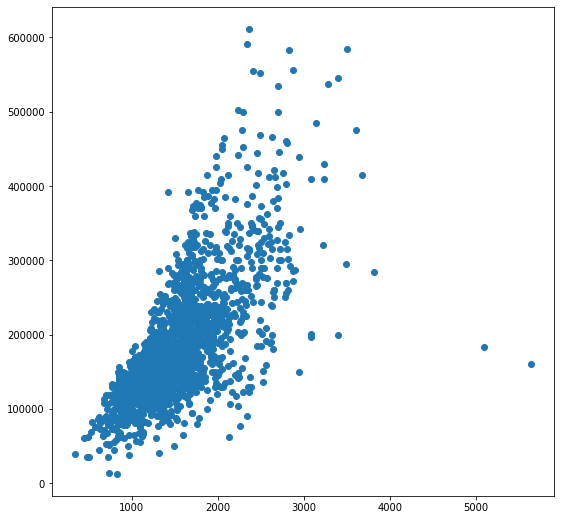

In [53]:
plt.figure(figsize=(9,9))
plt.scatter(housing['Gr Liv Area'], housing['SalePrice']);

***
Homes over 5000 sq foot are strange outliers, some seem to have tons of sq ft and low sale prices.  
These do not seem to be outliers, but rather incomplete sales or data.

In [54]:
over_5000 = housing.loc[housing['Gr Liv Area'] > 5000].index

In [55]:
over_5000

Int64Index([960, 1885], dtype='int64')

In [56]:
housing.drop(index=over_5000, inplace=True)

## Correlation with Sale Price

### Low Correlation

In [57]:
(housing.corr()['SalePrice'].abs() < .05).sum()

9

In [58]:
low_corr_dict = dict(housing.corr()['SalePrice'].abs() < .05)

In [59]:
low_corr = []
for name, value in low_corr_dict.items():
    if value == True:
        low_corr.append(name)

In [60]:
low_corr

['Utilities',
 'BsmtFin SF 2',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 '3Ssn Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

+ Even though these columns have low correlation with *SalePrice*, they may be useful in other circumstances, or have cofactors that make them important.  My beautiful LASSO model will eliminate the unimportant ones so they will stay.
+ Worth noting is that possibly the year and month sold have interesting characteristics because of the economy and yearly cycles.  This data could be useful in other predictive ways, such as time spent to sell a home.

<AxesSubplot:title={'center':'Correlation with Sale Price'}, xlabel='SalePrice'>

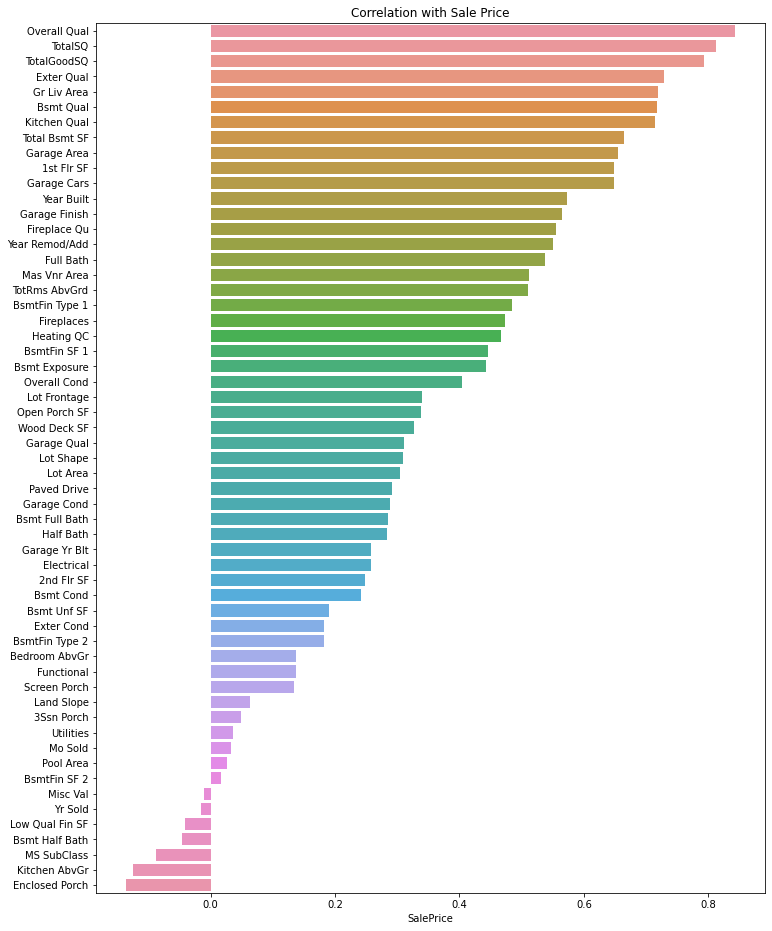

In [61]:
corr = housing.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(12, 16))
plt.title('Correlation with Sale Price')
# [1:] gets rid of SalePrice Correlation with itself
sns.barplot(x=corr.SalePrice[1:], y=corr.index[1:], orient='h')


## Overall Correlation

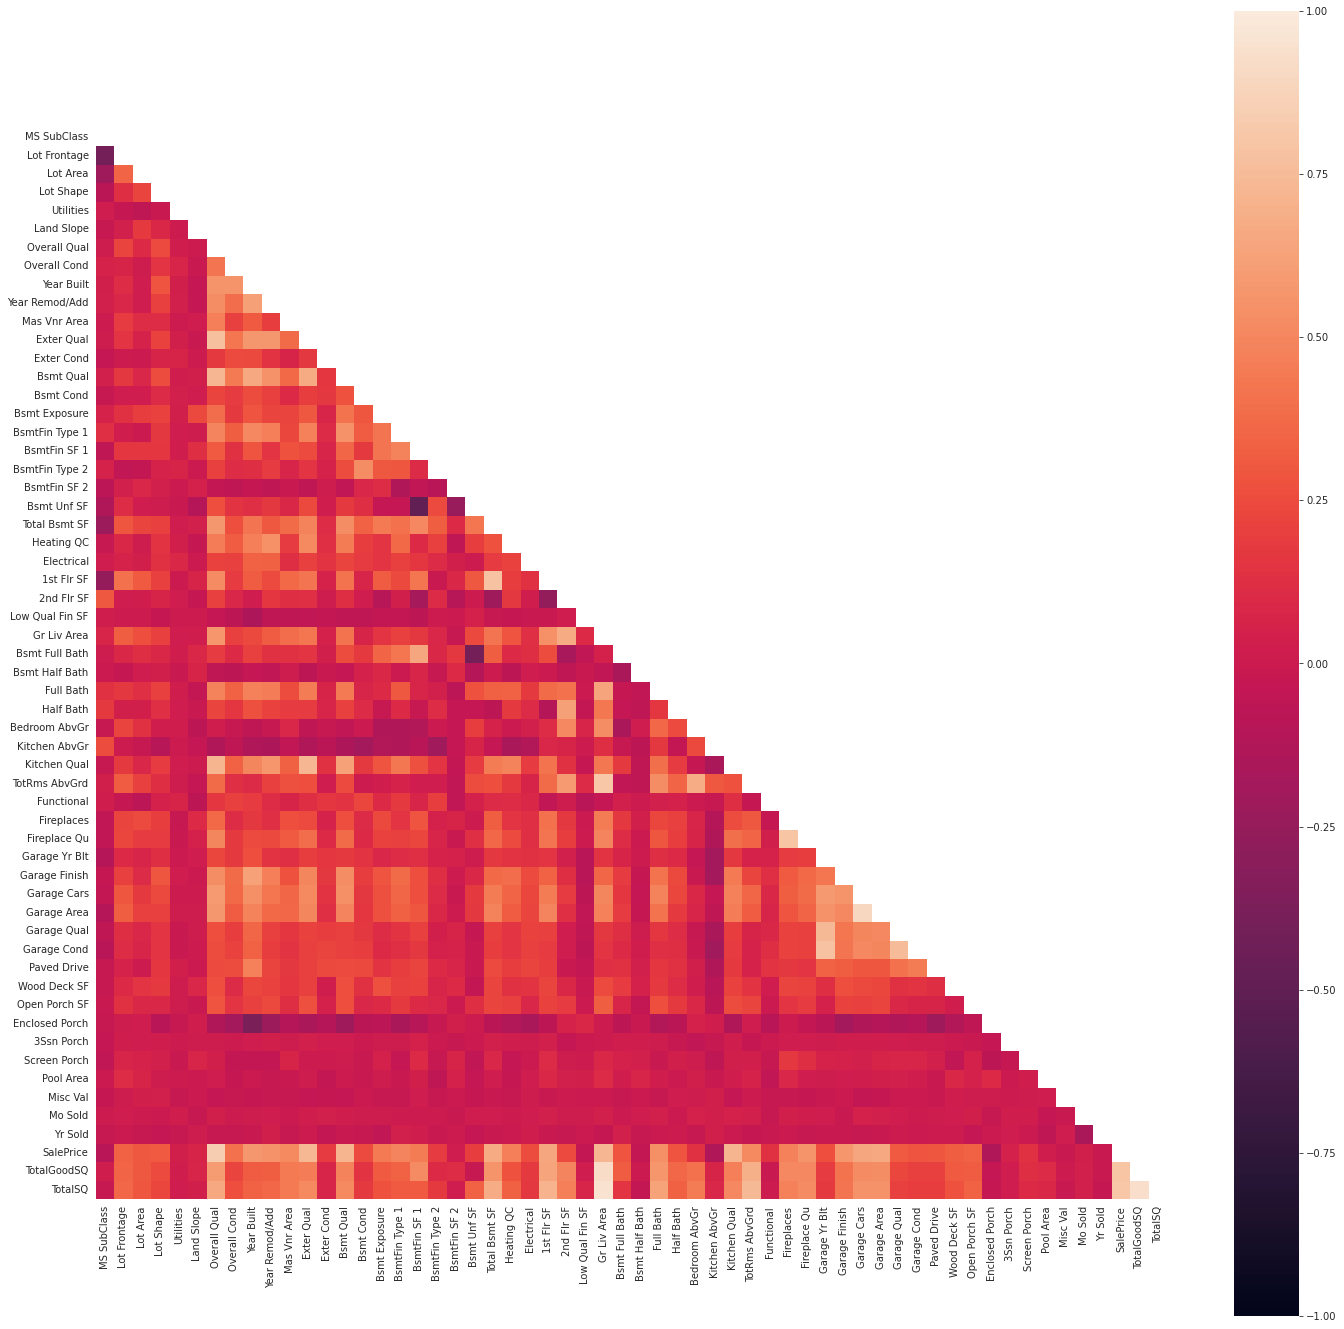

In [62]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(24,24))


corr = housing.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True)

### This is a BIG correlation plot.
#### I'm pretty sure I read one of my reference analyses call it soup.
#### >>> We'll kindy refer to it as *corrsoup*
So here's what we see based on this corrsoup heatmap:  
- *Overall Qual* has a high correlation -> HIGHER than my guess of *Gr Liv Area*
- *Gr Liv Area* has a high correlation
- *Garage Cars* and *Garage Area* have a high correlation
- *Full bath* is an indicator of *SalePrice*

## Plotting of the Data

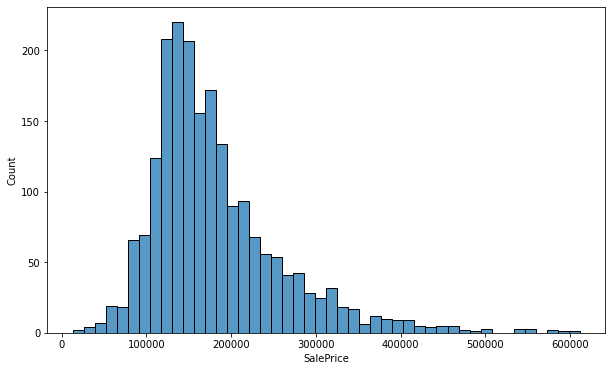

In [63]:
# Using SalePrice from the training set only, since the test set does not include SalePrice
plt.figure(figsize=(10,6))
sns.histplot(housing_train['SalePrice']);

> Right skewed.  This can be fixed with log to make it more normal.

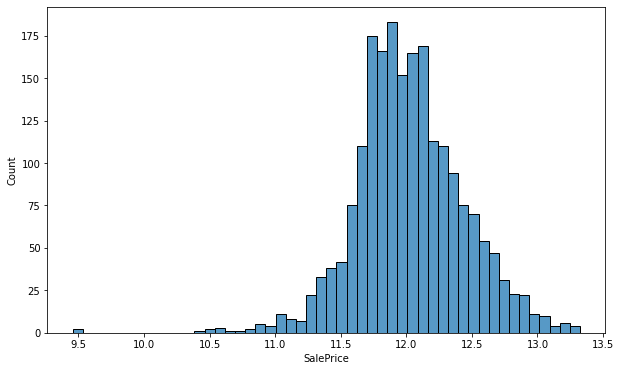

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(housing_train['SalePrice']));

* I'll make a mental note that this needs to be transformed to help the model

## Trends in Data

### Sales per Month Price vs # of Sales

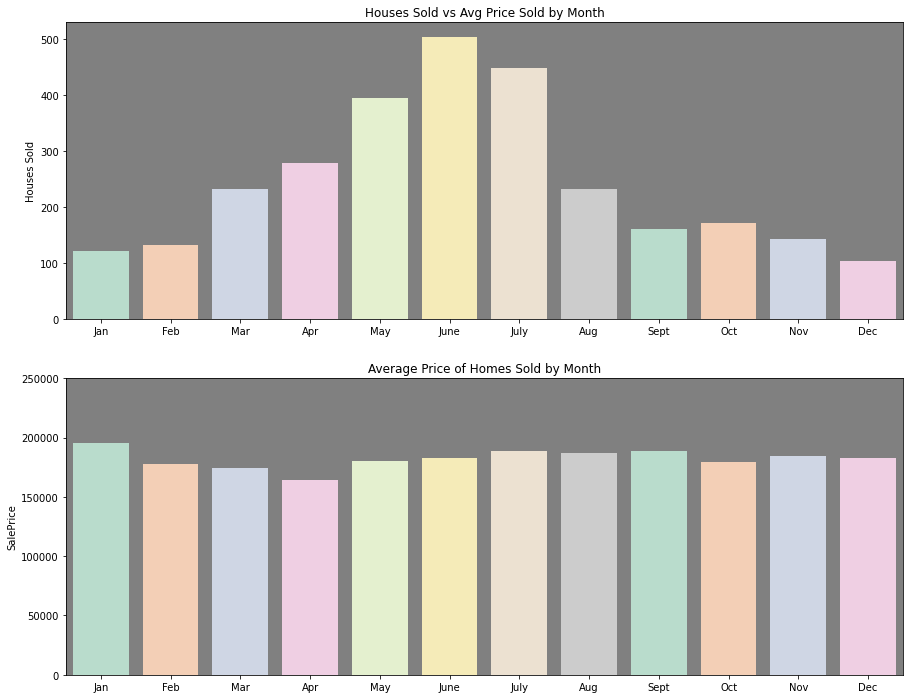

In [65]:
mo_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(15,12))


ax1.set_title('Houses Sold vs Avg Price Sold by Month')
ax1.set_facecolor('grey')
ax1.set_ylabel('Houses Sold')
sns.barplot(x=mo_labels,
            y=housing['Mo Sold'].value_counts().sort_index().values,
            ax=ax1,
            palette='Pastel2'
        );

ax2.set_title('Average Price of Homes Sold by Month')
ax2.set_facecolor('grey')
ax2.set_ylim(0, 250_000)
sns.barplot(x=mo_labels,
            y=housing.groupby('Mo Sold')['SalePrice'].mean(),
            ax=ax2,
            palette='Pastel2',
        );

### Avg Price based on Neighborhood

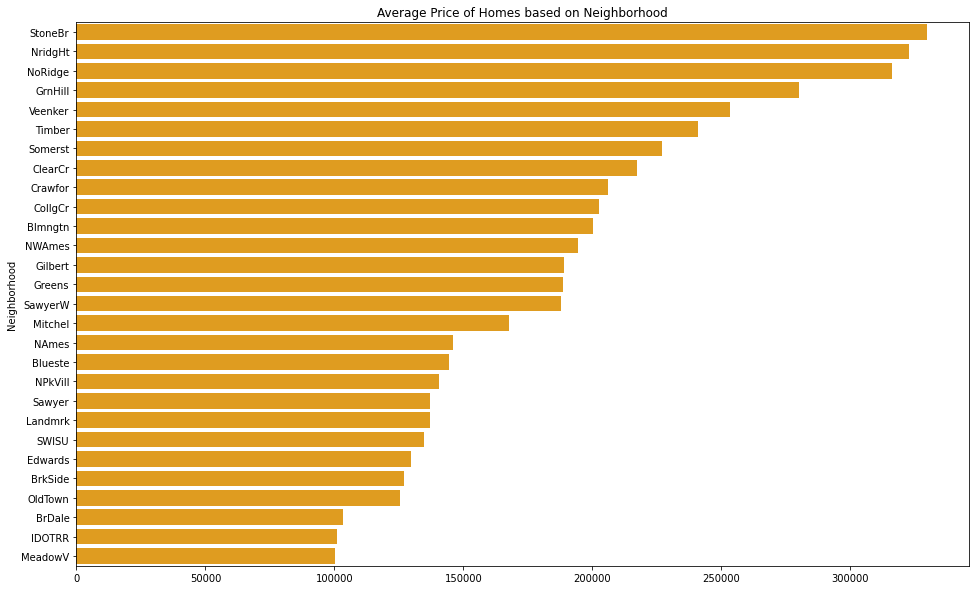

In [66]:
neighbors = housing.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,10))
plt.title('Average Price of Homes based on Neighborhood')

sns.barplot(
    y=neighbors.index,
    x=neighbors.values,
    color='orange',
    orient='h');

In [67]:
timbermask = housing.loc[housing['Neighborhood'] == 'Timber']

In [68]:
timberdata = {'Lot Frontage': [timbermask['Lot Frontage'].mean()],
              'Lot Area': [timbermask['Lot Area'].mean()],
              'Overall Quality': [timbermask['Overall Qual'].mean()],
              'Overall Condition': [timbermask['Overall Cond'].mean()],
              'Year Built': [int(timbermask['Year Built'].mean())],
              'Full Baths': [timbermask['Full Bath'].mean()],
              'Garage Area': [timbermask['Garage Area'].mean()],
              'Total Good Square Footage': [int(timbermask['TotalGoodSQ'].mean())],
              'Total Square Footage': [int(timbermask['TotalSQ'].mean())]
             }

In [69]:
timber = pd.DataFrame(data=timberdata)

In [70]:
timber.rename({0: 'Timber Neighborhood'}, inplace=True)

In [71]:
timber.T

,Timber Neighborhood
Lot Frontage,78.671790
Lot Area,18233.541667
Overall Quality,0.555083
Overall Condition,0.952250
Year Built,1995.000000
Full Baths,1.944444
Garage Area,604.666667
Total Good Square Footage,4171.000000
Total Square Footage,4801.000000


## Create Dummy Variables for Categorical Columns

In [72]:
housing = pd.get_dummies(data=housing, drop_first=True)

In [73]:
housing.head()

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Garage Type_No Garage,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,60,69.22459,13517,0.905511,1.0,0.881347,0.390255,0.753001,1976,2005,...,0,0,0,0,0,0,0,0,0,1
1,60,43.00000,11492,0.905511,1.0,0.881347,0.487379,1.000000,1996,1997,...,0,0,0,0,0,0,0,0,0,1
2,20,68.00000,7922,0.696399,1.0,0.881347,0.323346,0.750170,1953,2007,...,0,0,0,0,0,0,0,0,0,1
3,60,73.00000,9802,0.696399,1.0,0.881347,0.323346,1.000000,2006,2007,...,0,0,0,0,0,0,0,0,0,1
4,50,82.00000,14235,0.905511,1.0,0.881347,0.390255,0.753001,1900,1993,...,0,0,0,0,0,0,0,0,0,1


In [74]:
housing.shape

(2928, 197)

## Export Housing as csv for modeling phase

In [75]:
housing.to_csv('../datasets/housing_cleaned.csv')